# Evaluating Student's Performance


## Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
ds = pd.read_csv("C:\\Users\\Dell\\Udemy\\xAPI-Edu-Data.csv")

In [5]:
ds.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [6]:
X = ds.iloc[:,:-1].values
y = ds.iloc[:,16].values

## Visualization

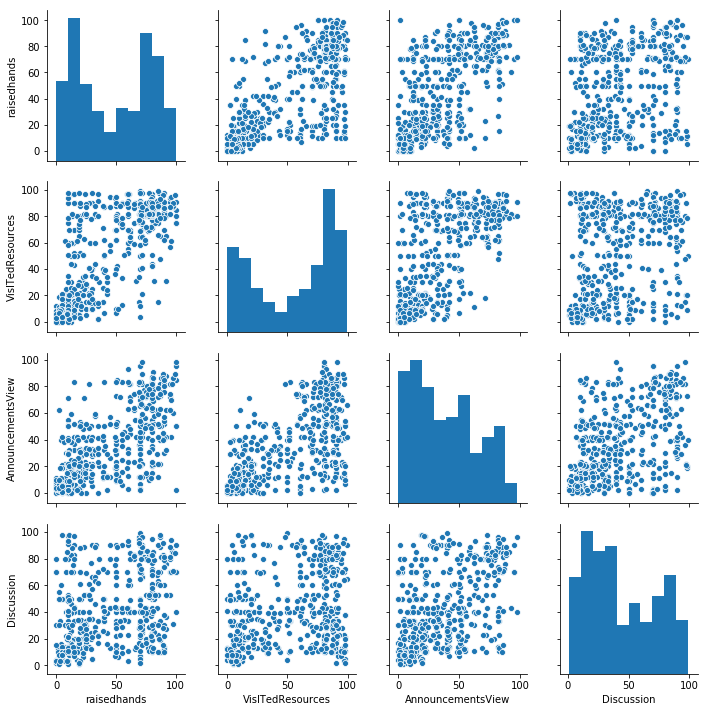

In [7]:
sns.pairplot(ds)

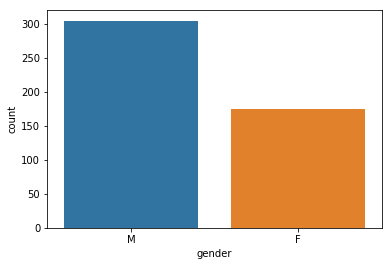

In [8]:
sns.countplot(ds["gender"])

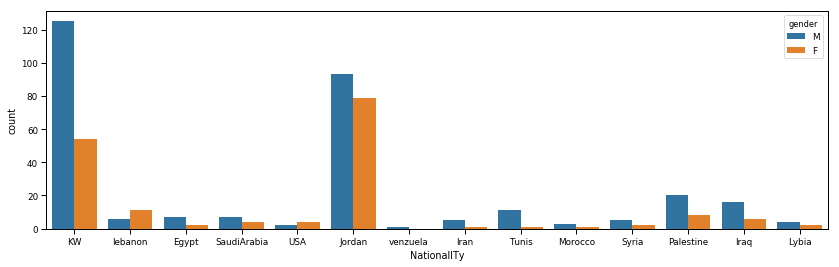

In [9]:
sns.set_context(context = 'paper')
plt.figure(figsize=(14,4))
sns.countplot(x = "NationalITy",hue = 'gender',data = ds)

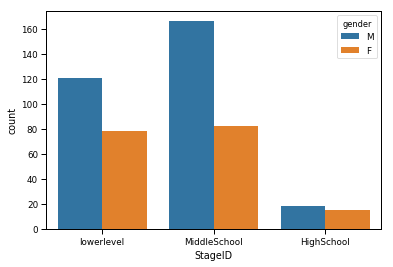

In [10]:
sns.countplot('StageID',data = ds,hue = 'gender')

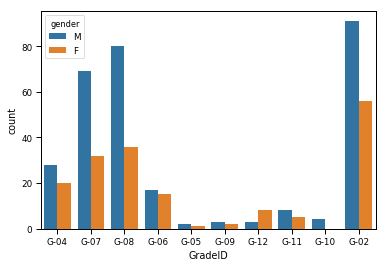

In [11]:
sns.countplot('GradeID',data = ds,hue = 'gender')


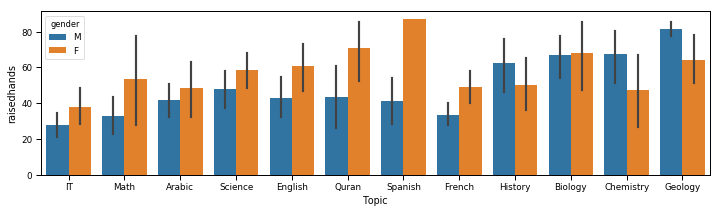

In [12]:
plt.figure(figsize = (12,3))
sns.barplot(x = 'Topic',y = 'raisedhands',data = ds,hue = 'gender')

## Preprocessing

In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
X_2 = ds.apply(le.fit_transform)
X_2.head()



,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,18,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,23,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,28,0,0,0,1
3,1,4,4,2,1,0,7,0,0,29,24,5,33,0,0,0,1
4,1,4,4,2,1,0,7,0,0,35,43,12,46,0,0,0,2


In [14]:
enc = OneHotEncoder()
enc.fit(X_2)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

In [15]:
onehotlabels = enc.transform(X_2).toarray()
onehotlabels.shape

(480, 420)

In [16]:
onehotlabels

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [17]:
X_2.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,18,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,23,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,28,0,0,0,1
3,1,4,4,2,1,0,7,0,0,29,24,5,33,0,0,0,1
4,1,4,4,2,1,0,7,0,0,35,43,12,46,0,0,0,2


In [18]:
X_2.shape

(480, 17)

In [19]:
X = X_2[{'gender','NationalITy','PlaceofBirth','StageID','GradeID','SectionID','Topic','Semester','Relation','raisedhands','VisITedResources','AnnouncementsView','Discussion','ParentAnsweringSurvey','ParentschoolSatisfaction','StudentAbsenceDays'}]
X.head()

,VisITedResources,NationalITy,PlaceofBirth,raisedhands,ParentAnsweringSurvey,ParentschoolSatisfaction,StageID,Semester,StudentAbsenceDays,SectionID,gender,GradeID,Discussion,AnnouncementsView,Relation,Topic
0,16,4,4,15,1,1,2,0,1,0,1,1,18,2,0,7
1,20,4,4,20,1,1,2,0,1,0,1,1,23,3,0,7
2,7,4,4,10,0,0,2,0,0,0,1,1,28,0,0,7
3,24,4,4,29,0,0,2,0,0,0,1,1,33,5,0,7
4,43,4,4,35,0,0,2,0,0,0,1,1,46,12,0,7


In [20]:
y = X_2['Class']
y.head()

0    2
1    2
2    1
3    1
4    2
Name: Class, dtype: int32


## Subset Selection

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.33, random_state=42)

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [23]:
testf = SelectKBest(score_func = chi2, k = 4)
fit = testf.fit(X_2,y)
np.set_printoptions(precision=3)
print(fit.scores_)
print(" ")

[1.215e+01 6.955e+00 9.757e+00 1.361e+00 7.187e+00 5.159e-01 1.390e+01
 3.992e+00 4.797e+01 2.958e+03 3.907e+03 2.415e+03 7.111e+02 4.172e+01
 2.682e+01 8.961e+01 3.000e+02]
 


In [24]:
features = fit.transform(X_2)

In [25]:
print(features[0:5,:])

[[15 16  2 18]
 [20 20  3 23]
 [10  7  0 28]
 [29 24  5 33]
 [35 43 12 46]]


In [26]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 1.0)
ridge.fit(X_2,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [27]:
def print_feat(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,key = lambda x:-np.abs(x[0]))
    return"+".join("%s * %s"%(round(coef,3), name) for coef,name in lst)

In [28]:
print("Ridge Model: ", print_feat(ridge.coef_))

Ridge Model:  0.0 * X0+0.0 * X1+-0.0 * X2+-0.0 * X3+0.0 * X4+0.0 * X5+0.0 * X6+-0.0 * X7+-0.001 * X8+-0.0 * X9+0.0 * X10+0.0 * X11+-0.0 * X12+-0.0 * X13+-0.0 * X14+-0.001 * X15+0.997 * X16


# Classification Modelling Techniques

## Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_pred = classifier.predict(X_test)

In [31]:
#from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_test,y_pred)
#cm

In [32]:
#fig,axis = plt.subplots(ncols = 2)
#plt.figure(num = 2,figsize=(15,8))
#sns.countplot(y_test,ax = axis[0])
#sns.countplot(y_pred,ax = axis[1])

#sns.countplot(y_test)

In [33]:
#c_score = np.trace(cm)/np.sum(cm)
#c_score

## K Neighbors Classifier


In [34]:
#from sklearn.neighbors import KNeighborsClassifier
#K_classifier = KNeighborsClassifier(n_neighbors = 3,metric = 'minkowski',p = 2)
#K_classifier.fit(X_train,y_train)

In [35]:
#knn_y_pred = K_classifier.predict(X_test)
#from sklearn.metrics import confusion_matrix
#K_cm = confusion_matrix(y_test,knn_y_pred)
#K_cm

In [36]:
#knn_score = np.trace(K_cm)/np.sum(K_cm)
#knn_score

## SVC 

In [37]:
from sklearn.svm import SVC
svc = SVC(kernel = 'poly' ,random_state=0)
svc.fit(X_train,y_train)


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [38]:
svc_y_pred = svc.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix
svc_cm = confusion_matrix(y_test,svc_y_pred)
svc_cm

array([[33,  3,  0],
       [ 5, 40,  1],
       [ 1, 10, 66]], dtype=int64)

In [40]:
svc_score = np.trace(svc_cm)/np.sum(svc_cm)
svc_score

0.8742138364779874

## Naive Bayes Classifier

In [41]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train,y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [42]:
nb_y_pred = nb_classifier.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test,nb_y_pred)
nb_cm

array([[36,  0,  0],
       [ 0, 46,  0],
       [ 0,  0, 77]], dtype=int64)

In [44]:
nb_score = np.trace(nb_cm)/np.sum(nb_cm)
nb_score

1.0

## Decision Trees

In [45]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)

In [46]:
tree_classifier.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [47]:
tree_y_pred = tree_classifier.predict(X_test)
tree_y_pred

array([2, 1, 0, 0, 0, 1, 2, 1, 2, 2, 2, 0, 2, 2, 0, 0, 1, 2, 1, 2, 0, 0,
       1, 2, 2, 1, 0, 2, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 2, 2, 2, 0, 1, 2,
       2, 1, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       1, 0, 1, 0, 2, 0, 2, 2, 2, 1, 2, 1, 1, 2, 0, 2, 1, 0, 0, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 1, 0, 1, 0, 2, 1, 2, 1, 1, 0, 2, 2, 0, 2, 2, 1,
       2, 2, 2, 0, 2, 1, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 1, 0, 0, 0, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2])

In [48]:
from sklearn.metrics import confusion_matrix
tree_cm = confusion_matrix(y_test,tree_y_pred)
tree_cm

array([[36,  0,  0],
       [ 0, 46,  0],
       [ 0,  0, 77]], dtype=int64)

In [49]:
tree_score = np.trace(tree_cm)/np.sum(tree_cm)
tree_score

1.0

## Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
rand_classifier = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rand_classifier.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [51]:
rand_y_pred = rand_classifier.predict(X_test)


In [52]:
from sklearn.metrics import confusion_matrix
rand_cm = confusion_matrix(y_test,rand_y_pred)
rand_cm

array([[34,  2,  0],
       [ 0, 46,  0],
       [ 0,  0, 77]], dtype=int64)